# Feature Selection

<ul>
    <li>Reduce Overfitting</li>
    <li>Improves Accuracy</li>
    <li>Reduce Training Time</li>
</ul>

Fro more information :<br>
https://scikit-learn.org/stable/modules/feature_selection.html

**Questions?**
<br>
The effect of low variance features on performance?

## Removing features with low variance

In [6]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
# load data
filename = '../pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = VarianceThreshold(threshold=(.8 * (1 - .8)))
features_low_variance = test.fit_transform(X)
# summarize scores
set_printoptions(precision=3)
# summarize selected features
print(features_low_variance[0:5,:])

[[  6.  148.   72.   35.    0.   33.6  50. ]
 [  1.   85.   66.   29.    0.   26.6  31. ]
 [  8.  183.   64.    0.    0.   23.3  32. ]
 [  1.   89.   66.   23.   94.   28.1  21. ]
 [  0.  137.   40.   35.  168.   43.1  33. ]]


In [7]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
test

VarianceThreshold(threshold=0.15999999999999998)

In [9]:
featureVariances = pd.concat([pd.DataFrame(names),pd.DataFrame(test.variances_)],axis=1)
featureVariances.columns = ['Specs','Variance']  #naming the dataframe columns
print(featureVariances.nlargest(10,'Variance'))  #print 10 best features

  Specs      Variance
4  test  13263.886875
1  plas   1020.917262
2  pres    374.159449
3  skin    254.141900
7   age    138.122964
5  mass     62.079046
0  preg     11.339272
6  pedi      0.109636


## Univariate Selection

In [5]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = '../pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2,k=4)
fit = test.fit(X, Y)
# summarize scores
#print(fit.scores_)
features_univariate = fit.transform(X)
# summarize selected features

print(features_univariate[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [4]:
featureScores = pd.concat([pd.DataFrame(names),pd.DataFrame(fit.scores_)],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Specs        Score
4  test  2175.565273
1  plas  1411.887041
7   age   181.303689
5  mass   127.669343
0  preg   111.519691
3  skin    53.108040
2  pres    17.605373
6  pedi     5.392682


## Recursive Feature Selection


In [4]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
filename = '../pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver="lbfgs", max_iter=200)
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

#print(X[0:5,:])
print("Num Features: %d",fit.n_features_)
print("Selected Features: %s",fit.support_)
print("Feature Ranking: %s",fit.ranking_) 

features_recursive = X[:,[0,5,6]]
print(features_recursive[0:5,:])

Num Features: %d 3
Selected Features: %s [ True False False False False  True  True False]
Feature Ranking: %s [1 2 4 6 5 1 1 3]
[[ 6.    33.6    0.627]
 [ 1.    26.6    0.351]
 [ 8.    23.3    0.672]
 [ 1.    28.1    0.167]
 [ 0.    43.1    2.288]]


## PCA

In [5]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
filename = '../pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s", fit.explained_variance_ratio_)
print(fit.components_)
features_PCA = fit.transform(X)
print(features_PCA[0:5,:])

Explained Variance: %s [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]
[[-7.571e+01 -3.595e+01 -7.261e+00]
 [-8.236e+01  2.891e+01 -5.497e+00]
 [-7.463e+01 -6.791e+01  1.946e+01]
 [ 1.108e+01  3.490e+01 -5.302e-02]
 [ 8.974e+01 -2.747e+00  2.521e+01]]


## Feature Importance : ExtraTreesClassifier

The scores suggest at the importance of plas, age
and mass.

In [34]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
filename = '../pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators =100)
model.fit(X, Y)
features_importance = model.feature_importances_
print(features_importance)
features_importance = X[:,[1,5,7]]
print(features_importance[0:5,:])

[0.108 0.236 0.1   0.077 0.075 0.142 0.121 0.14 ]
[[148.   33.6  50. ]
 [ 85.   26.6  31. ]
 [183.   23.3  32. ]
 [ 89.   28.1  21. ]
 [137.   43.1  33. ]]


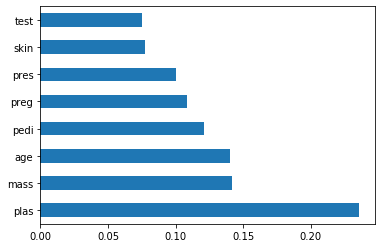

In [38]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=names[0:8])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

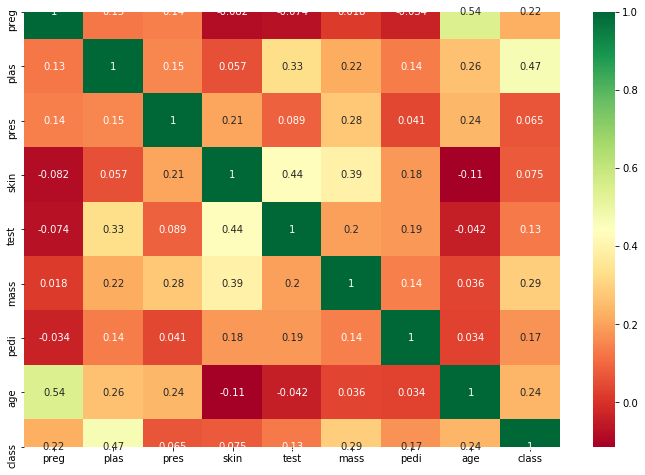

In [51]:
# Correlation of features
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# load data
filename = '../pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

#get correlations of each features in dataset
corrmat = dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))

#plot heat map
g=sns.heatmap(dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Train Logistic Regression

on **All features**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2,random_state=7)

In [10]:
model = LogisticRegression(solver="lbfgs", max_iter=200)

In [11]:
model.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
prediction = model.predict(xTest)

In [13]:
prediction

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0.])

In [14]:
acc_features = accuracy_score(yTest, prediction)
acc_features

0.7922077922077922

on **features_univariate**

In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(features_univariate, Y, test_size = 0.2,random_state=7)
model = LogisticRegression(solver="lbfgs", max_iter=200)
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)
acc_univariate = accuracy_score(yTest, prediction)

on **features_recursive**

In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(features_recursive, Y, test_size = 0.2,random_state=7)
model = LogisticRegression(solver="lbfgs", max_iter=200)
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)
acc_recursive = accuracy_score(yTest, prediction)

on **features_PCA**

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(features_PCA, Y, test_size = 0.2,random_state=7)
model = LogisticRegression(solver="lbfgs", max_iter=200)
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)
acc_PCA = accuracy_score(yTest, prediction)

on **features_Importance**

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(features_importance, Y, test_size = 0.2,random_state=7)
model = LogisticRegression(solver="lbfgs", max_iter=200)
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)
acc_importance = accuracy_score(yTest, prediction)

on **features_low_variance**

In [21]:
xTrain, xTest, yTrain, yTest = train_test_split(features_low_variance, Y, test_size = 0.2,random_state=7)
model = LogisticRegression(solver="lbfgs", max_iter=200)
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)
acc_low_variance = accuracy_score(yTest, prediction)

### Results

In [22]:
print("Accuracy on all features : {}".format(acc_features))
print("Accuracy on univariate features : {}".format(acc_univariate))
print("Accuracy on recursive features : {}".format(acc_recursive))
print("Accuracy on PCA features : {}".format(acc_PCA))
print("Accuracy on importance features : {}".format(acc_importance))
print("Accuracy on low variance features : {}".format(acc_low_variance))

Accuracy on all features : 0.7922077922077922
Accuracy on univariate features : 0.7792207792207793
Accuracy on recursive features : 0.7077922077922078
Accuracy on PCA features : 0.7532467532467533
Accuracy on importance features : 0.7727272727272727
Accuracy on hogh variance features : 0.8051948051948052
